<a href="https://colab.research.google.com/github/ToshikiNakamura0412/my_ipynb_vision/blob/master/image_trim_for_diff_camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(720, 1280, 3)
aspect: 1.7777777777777777


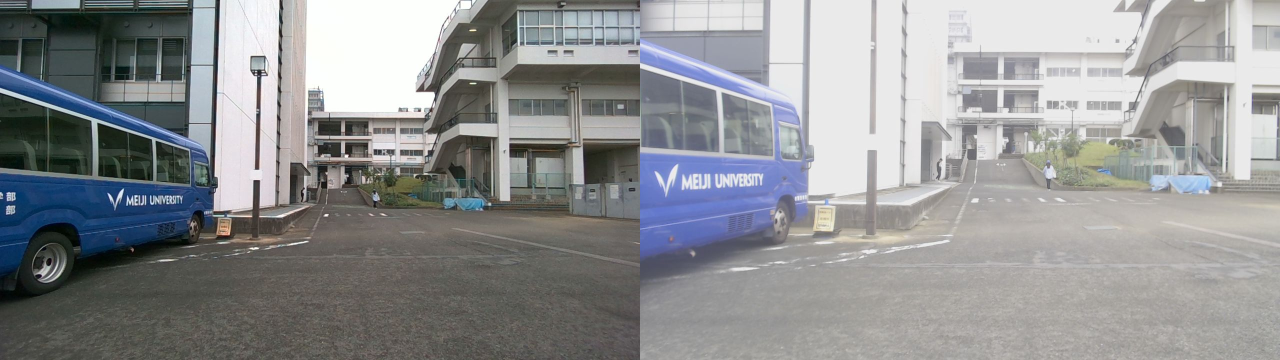

h_fov1: 89.58772303986704, v_fov1: 58.42775538965709
h_fov2: 66.42939651599299, v_fov2: 40.406673755091234
common_h_fov: 66.42939651599299, common_v_fov: 40.406673755091234
(497, 884, 3)
aspect: 1.778672032193159


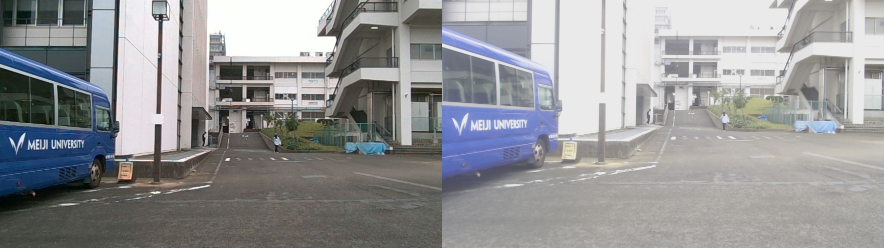

In [ ]:
import cv2
import math
from google.colab.patches import cv2_imshow

img1 = cv2.imread("image_0_rs.png")
img2 = cv2.imread("image_0_logi.png")
print(img1.shape)
print(f"aspect: {img1.shape[1] / img1.shape[0]}")
im_h = cv2.hconcat([img1, img2])
im_h = cv2.resize(im_h, (im_h.shape[1] // 2, im_h.shape[0] // 2))
cv2_imshow(im_h)

# RealSense D455
camera_matrix1 = [
    644.621826171875,   0.0            , 640.3682861328125,
      0.0           , 643.7779541015625, 359.1807861328125,
      0.0           ,   0.0            ,   1.0
]

# Logicool C920r
camera_matrix2 = [
    977.47514,   0.0    , 643.2183,
      0.0    , 978.27553, 360.102 ,
      0.0    ,   0.0    ,   1.0
]

# 画像の解像度
height = img1.shape[0]
width = img1.shape[1]

# カメラ1の焦点距離
fx1 = camera_matrix1[0]
fy1 = camera_matrix1[4]

# カメラ2の焦点距離
fx2 = camera_matrix2[0]
fy2 = camera_matrix2[4]

# カメラ1の水平画角と垂直画角を計算
h_fov1 = 2 * math.degrees(math.atan(width / (2 * fx1)))
v_fov1 = 2 * math.degrees(math.atan(height / (2 * fy1)))
# h_fov1 = 90
# v_fov1 = 65

# カメラ2の水平画角と垂直画角を計算
h_fov2 = 2 * math.degrees(math.atan(width / (2 * fx2)))
v_fov2 = 2 * math.degrees(math.atan(height / (2 * fy2)))


# 共通部分のFoVを計算
common_h_fov = min(h_fov1, h_fov2)
common_v_fov = min(v_fov1, v_fov2)

print(f"h_fov1: {h_fov1}, v_fov1: {v_fov1}")
print(f"h_fov2: {h_fov2}, v_fov2: {v_fov2}")
print(f"common_h_fov: {common_h_fov}, common_v_fov: {common_v_fov}")

# 共通部分のトリミング範囲を計算
common_width = width * (common_h_fov / h_fov1)
common_height = height * (common_v_fov / v_fov1)

# トリミング範囲の中心を計算
center_x = width / 2
center_y = height / 2

# トリミング範囲の左上と右下の座標を計算
left = center_x - common_width / 2
right = center_x + common_width / 2
top = center_y - common_height / 2
bottom = center_y + common_height / 2

img1_trim = img1[int(top):int(bottom), int(left):int(right)]

# trim by aspect
aspect = img1.shape[1] / img1.shape[0]
center_x = img1_trim.shape[1] / 2
center_y = img1_trim.shape[0] / 2
if img1_trim.shape[1] / img1_trim.shape[0] > aspect:
  left = center_x - (img1_trim.shape[0] * aspect) / 2
  right = center_x + (img1_trim.shape[0] * aspect) / 2
  img1_trim = img1_trim[:, int(left):int(right)]
else:
  top = center_y - center_x * aspect / 2
  bottom = center_y + center_x * aspect / 2
  img1_trim = img1_trim[int(top):int(bottom), :]

print(img1_trim.shape)
print(f"aspect: {img1_trim.shape[1] / img1_trim.shape[0]}")

img2 = cv2.resize(img2, (img1_trim.shape[1], img1_trim.shape[0]))
im_h = cv2.hconcat([img1_trim, img2])
im_h = cv2.resize(im_h, (im_h.shape[1] // 2, im_h.shape[0] // 2))
cv2_imshow(im_h)